In [7]:
from flask import Flask, render_template, request, redirect, url_for, session, jsonify
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['airportDB']
users = db['users']
flights = db["flights"]
bookings = db["bookings"]
discount = db["discount"]

In [8]:
query = flights.aggregate([    {        '$project': {            '_id': 0,             'fromLocation': '$flight_details.fromLocation',            'toLocation': '$flight_details.toLocation'        }    }])

from_locations_dict = {}

for res in query:
    key = (res['fromLocation'])
    from_locations_dict[key] = from_locations_dict.get(key, 0) + 1

print(from_locations_dict)


{'London': 9, 'Paris': 8, 'Chicago': 10, 'Dubai': 7, 'Mumbai': 2, 'Toronto': 3, 'Tokyo': 7, 'Melbourne': 1, 'Istanbul': 4, 'Miami': 1, 'Hong Kong': 3, 'Sydney': 4, 'Dallas': 2, 'Dublin': 2, 'Amsterdam': 5, 'New York': 4, 'Abu Dhabi': 3, 'Houston': 1, 'Atlanta': 4, 'Munich': 1, 'Los Angeles': 1, 'Doha': 4, 'Seoul': 1, 'Johannesburg': 1, 'Frankfurt': 5, 'Rome': 2, 'Moscow': 2, 'Berlin': 1, 'Zurich': 1, 'Delhi': 1}


In [9]:
from_locations_dict = dict(sorted(from_locations_dict.items(), key=lambda item: item[1], reverse=True))
from_locations_dict

{'Chicago': 10,
 'London': 9,
 'Paris': 8,
 'Dubai': 7,
 'Tokyo': 7,
 'Amsterdam': 5,
 'Frankfurt': 5,
 'Istanbul': 4,
 'Sydney': 4,
 'New York': 4,
 'Atlanta': 4,
 'Doha': 4,
 'Toronto': 3,
 'Hong Kong': 3,
 'Abu Dhabi': 3,
 'Mumbai': 2,
 'Dallas': 2,
 'Dublin': 2,
 'Rome': 2,
 'Moscow': 2,
 'Melbourne': 1,
 'Miami': 1,
 'Houston': 1,
 'Munich': 1,
 'Los Angeles': 1,
 'Seoul': 1,
 'Johannesburg': 1,
 'Berlin': 1,
 'Zurich': 1,
 'Delhi': 1}

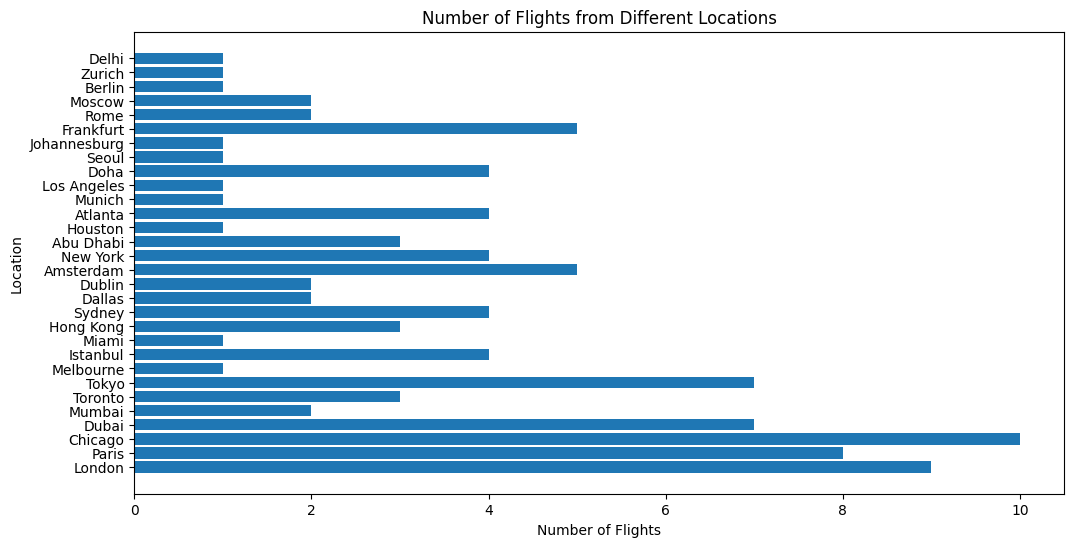

In [10]:
import matplotlib.pyplot as plt

# Input data
from_locations_dict = {'London': 9, 'Paris': 8, 'Chicago': 10, 'Dubai': 7, 'Mumbai': 2, 'Toronto': 3, 'Tokyo': 7, 'Melbourne': 1, 'Istanbul': 4, 'Miami': 1, 'Hong Kong': 3, 'Sydney': 4, 'Dallas': 2, 'Dublin': 2, 'Amsterdam': 5, 'New York': 4, 'Abu Dhabi': 3, 'Houston': 1, 'Atlanta': 4, 'Munich': 1, 'Los Angeles': 1, 'Doha': 4, 'Seoul': 1, 'Johannesburg': 1, 'Frankfurt': 5, 'Rome': 2, 'Moscow': 2, 'Berlin': 1, 'Zurich': 1, 'Delhi': 1}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal bar chart
ax.barh(list(from_locations_dict.keys()), list(from_locations_dict.values()))

# Add title and labels
ax.set_title('Number of Flights from Different Locations')
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Location')

# Display the plot
plt.show()
